In [224]:
%pylab inline
import pandas as pd
import seaborn as sns
import scipy
import skimage

import os.path as op
import sys
path_to_script = "."
pth = op.join(path_to_script, "../../micrant/")
sys.path.insert(0, pth)
# pth = op.join(path_to_script, "../../scaffan/")
# sys.path.insert(0, pth)

import pandas as pd
import micrant

import micrant.micrant_app
import micrant.image_sort_tools as imst

sns.set_style("ticks")
from pathlib import Path
output_path_images = Path("../docs/")

# df = pd.read_excel("C:/Users/Jirik/data/medical/processed/SA_experiments.xlsx")
df = pd.read_excel("C:/Users/Jirik/data/medical/processed/scaffan2019/metacentrum/SA_experiments.xlsx")
df

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm', 'amax', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,Annotation Color,Annotation Details,Annotation ID,Annotation Title,Area,Area unit,Branch number,Central Vein Dice,Central Vein Jaccard,Central vein area,...,Processing;Skeleton Analysis;Working Resolution,Processing;Texture Analysis;GLCM Levels,Processing;Texture Analysis;Tile Size,Processing;Texture Analysis;Tile Spacing,Processing;Texture Analysis;Working Resolution,Scaffan Version,Skeleton length,platform.node,platform.processor,platform.system
0,#00FF00,PFCVI=2 SNI=2 SWP=1 SQZ=0.4 CVM=0 IFE=0,6,NaN,0.777046,mm,22489.0,NaN,NaN,0.056655,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,45.58554,krux2.ncbr.muni.cz,NaN,Linux
1,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.8,6,NaN,1.959020,mm,8871.0,NaN,NaN,0.085619,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,18.66592,konos2.fav.zcu.cz,NaN,Linux
2,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9,1,NaN,1.562744,mm,NaN,0.108730,0.057491,0.137554,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
3,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9,2,NaN,1.031514,mm,NaN,0.072651,0.037695,0.148508,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
4,#00FF00,PFCVI=1 SNI=0 SWP=0 SQZ=0.1,6,NaN,1.184912,mm,NaN,0.035911,0.018284,0.148555,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=1.5,9,NaN,0.920082,mm,14435.0,NaN,NaN,0.074718,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,28.39382,elmo5-14.hw.elixir-czech.cz,NaN,Linux
316,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=2.0,10,NaN,0.817524,mm,15528.0,NaN,NaN,0.027523,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,29.15094,elmo5-14.hw.elixir-czech.cz,NaN,Linux
317,#0000FF,IFE=0 CVM=0 SQZ=0.1 SNI=2.0,11,NaN,1.190702,mm,15148.0,NaN,NaN,0.119581,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,26.50921,elmo5-14.hw.elixir-czech.cz,NaN,Linux
318,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=2.0,12,NaN,1.728910,mm,35651.0,NaN,NaN,0.096388,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,65.94952,elmo5-14.hw.elixir-czech.cz,NaN,Linux


In [225]:
df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Title', 'Area', 'Area unit', 'Branch number',
       'Central Vein Dice', 'Central Vein Jaccard', 'Central vein area',
       'Datetime', 'Dead ends number', 'Experiment Datetime',
       'Experiment Title', 'File Name', 'File Path', 'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var', 'Input;Data Info', 'Input;File Path', 'Job ID',
       'Lobulus Border Dice', 'Lobulus Border Jaccard',
       'Lobulus Boundary Compactness', 'Lobulus Equivalent Diameter',
       '

In [226]:
np.unique(df["Scaffan Version"])

array(['0.14.0'], dtype=object)

In [227]:
np.unique(df["Experiment Datetime"])

array(['2019-07-23 22:31:23', '2019-07-23 22:32:14',
       '2019-07-23 22:32:29', '2019-08-19 15:49:13',
       '2019-08-21 05:46:08'], dtype=object)

In [228]:

# exp_title = "first area evaluation"
exp_title = "first seg eval"
# scaffan_version = "0.14.0"
select_by_datetime = ['2019-07-23 22:31:23', '2019-07-23 22:32:14', '2019-08-19 15:49:13', '2019-08-21 05:46:08']
# select_by_datetime = ['2019-07-23 22:31:23'] #, '2019-07-23 22:32:14']

## Use Mikrant SNI update

In [229]:
mapp = micrant.micrant_app.MicrAnt()
xfn = mapp.parameters.param("Output", "Common Spreadsheet File").value()
df_micrant = pd.read_excel(xfn)

2020-04-04 23:23:19.810 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.micrant_cache.yaml
2020-04-04 23:23:19.815 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-04-04 23:23:19.819 | DEBUG    | io3d.datasets:join_path:304 - sample_data_pathC:\Users\Jirik\data
2020-04-04 23:23:19.821 | DEBUG    | io3d.datasets:join_path:305 - path C:\Users\Jirik\data
2020-04-04 23:23:19.829 | DEBUG    | micrant.micrant_app:__init__:84 - common_spreadsheet_file loaded as: C:/Users/Jirik/data/micrant_data.xlsx


In [230]:
def get_col_from_ann_details(df, colname):
    df[f"{colname}"] = pd.to_numeric(df["Annotation Details"].str.extract(f'{colname}=(\d*\.?\d*)')[0])
    return df
get_col_from_ann_details(df, "PFCVI")
get_col_from_ann_details(df, "SNI")
get_col_from_ann_details(df, "SWP");
get_col_from_ann_details(df, "CMP");
get_col_from_ann_details(df, "IFE");
get_col_from_ann_details(df, "SQZ");
df = df.rename(columns={'SNI':"SNIraw"})
df = imst.add_parameter_column(df, df_micrant, "SNI")

df["Sum Semi-q"] = df["PFCVI"] + df["SNI"] + df["SWP"]

.\../../micrant\micrant\image_sort_tools.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Annotation Details"].str.extract(f"{colname}=" + r"(\d*\.?\d*)")[0]


## Fill missing data 

In [231]:
# fill missing sni with SNIraw 
empty_selection = df["SNI"].isna()
display(df.loc[empty_selection][["SNI","SNIraw"]])
df.loc[empty_selection, "SNI"] = df.loc[empty_selection, "SNIraw"]
#df["SNIraw"]
#df["SNI"]
# selection

display(df.loc[empty_selection][["SNI","SNIraw"]])

,SNI,SNIraw
14,NaN,1.5
17,NaN,1.5
103,NaN,1.5
106,NaN,1.5
154,NaN,2.0


,SNI,SNIraw
14,1.5,1.5
17,1.5,1.5
103,1.5,1.5
106,1.5,1.5
154,2.0,2.0


In [232]:
# fill missing SNIraw with SNI
empty_selection = df["SNIraw"].isna()
display(df.loc[empty_selection][["SNI","SNIraw"]])
df.loc[empty_selection, "SNIraw"] = df.loc[empty_selection, "SNI"]
display(df.loc[empty_selection][["SNI","SNIraw"]])

,SNI,SNIraw
306,1.498582,NaN


,SNI,SNIraw
306,1.498582,1.498582


## SNI and SNIraw difference

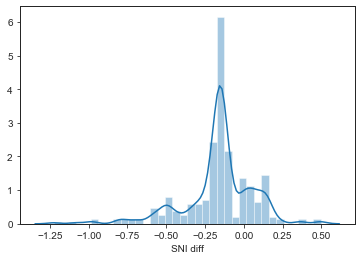

In [233]:
df["SNI diff"] = df["SNI"] - df["SNIraw"]
sns.distplot(df["SNI diff"])


In [234]:

mx = np.max(df["SNI"] - df["SNIraw"])
print(mx)
amax = np.argmax(df["SNI"] - df["SNIraw"])
df.loc[amax][["Annotation ID", "File Name", "SNI", "SNIraw", "Annotation Color", "Annotation Details"]]

0.4945079978179361


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


Annotation ID                                            8
File Name                        PIG-003_J-18-0165_HE.ndpi
SNI                                                1.49451
SNIraw                                                   1
Annotation Color                                   #00FF00
Annotation Details    PFCVI=2 SNI=1 SWP=1  SQZ=0.4 IFE=0.5
Name: 18, dtype: object

In [235]:
df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Title', 'Area', 'Area unit', 'Branch number',
       'Central Vein Dice', 'Central Vein Jaccard', 'Central vein area',
       'Datetime', 'Dead ends number', 'Experiment Datetime',
       'Experiment Title', 'File Name', 'File Path', 'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var', 'Input;Data Info', 'Input;File Path', 'Job ID',
       'Lobulus Border Dice', 'Lobulus Border Jaccard',
       'Lobulus Boundary Compactness', 'Lobulus Equivalent Diameter',
       '

# Add descriptors

In [236]:
df['Dead ends number norm'] = df['Dead ends number'] / df['Lobulus Equivalent Surface']
df['Skeleton length norm'] = df['Skeleton length'] / df['Lobulus Equivalent Surface']
df['Branch number norm'] = df['Branch number'] / df['Lobulus Equivalent Surface']
df['Relative dead ends number'] = df['Dead ends number'] / df['Area']
df['Relative skeleton length'] = df['Skeleton length'] / df['Area']
df['Relative branch number'] = df['Branch number'] / df['Area']

# Add annotation

In [237]:
# Overal scaffold quality
df["OSQ"] = df.SNI * (1-df.SQZ)

# Lobulus Structure Analysis

In [238]:
dfselector =  \
(df["Experiment Title"] == exp_title) &\
(df["Experiment Datetime"].isin(select_by_datetime)) &\
(df["Annotation Details"].notnull())
# (df["Experiment Datetime"] == select_by_datetime) # &\
# (df["Scaffan Version"] == scaffan_version)
dfcor = df[dfselector
][["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation", "Skeleton length", 
            "PFCVI", 
            "SNI", 
            "SWP", 
   "CMP",
   "Annotation Details"
#             "Sum Semi-q", 
#    "Experiment Title", "Scaffan Version"
  ]]
dfcor

,Branch number,GLCM Energy,GLCM Homogenity,GLCM Correlation,Skeleton length,PFCVI,SNI,SWP,CMP,Annotation Details
0,22489.0,0.479750,0.760151,0.896563,45.58554,2.0,1.828936,1.0,NaN,PFCVI=2 SNI=2 SWP=1 SQZ=0.4 CVM=0 IFE=0
1,8871.0,0.747521,0.890338,0.649943,18.66592,1.0,0.160520,0.0,0.8,PFCVI=1 SNI=0 SWP=0 CMP=0.8
28,20997.0,0.489401,0.775246,0.884424,41.95737,NaN,1.729739,NaN,0.8,SNI=1.5 CMP=0.8 IFE=0 SQZ=0.4 CVM=0
29,13467.0,0.553613,0.783606,0.870150,26.14248,NaN,1.551923,NaN,0.7,SNI=1.5 CMP=0.7 IFE=0 SQZ=0.3 CVM=0
30,15370.0,0.519606,0.784930,0.874722,30.87903,NaN,1.559412,NaN,0.6,SNI=1.5 CMP=0.6 IFE=0 SQZ=0.5 CVM=0
...,...,...,...,...,...,...,...,...,...,...
315,14435.0,0.530189,0.790186,0.720899,28.39382,NaN,0.275843,NaN,NaN,IFE=0 CVM=0 SQZ=0.2 SNI=1.5
316,15528.0,0.491049,0.780196,0.744928,29.15094,NaN,1.763300,NaN,NaN,IFE=0 CVM=0 SQZ=0.2 SNI=2.0
317,15148.0,0.539013,0.801884,0.716112,26.50921,NaN,1.873795,NaN,NaN,IFE=0 CVM=0 SQZ=0.1 SNI=2.0
318,35651.0,0.593849,0.825416,0.749420,65.94952,NaN,1.909943,NaN,NaN,IFE=0 CVM=0 SQZ=0.2 SNI=2.0


In [239]:
features = [
    "Branch number", "Skeleton length", "Dead ends number", 
    "Branch number norm", "Skeleton length norm", "Dead ends number norm", 
    "Relative branch number", "Relative skeleton length", "Relative dead ends number", 
                                  'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var',
        'Lobulus Boundary Compactness',    
           ]

annotations = [
    "PFCVI", "SNI", "SWP", "CMP", "IFE", "SQZ",  "OSQ",
]

## Size of dataset per annotation

In [240]:
df[dfselector][[*annotations]].describe()

,PFCVI,SNI,SWP,CMP,IFE,SQZ,OSQ
count,48.000000,293.000000,50.000000,102.000000,230.000000,244.000000,244.000000
mean,1.604167,1.498401,0.900000,0.682353,0.063478,0.278689,1.158958
std,0.494204,0.535919,0.814411,0.118916,0.205526,0.152202,0.394640
min,1.000000,0.121735,0.000000,0.500000,0.000000,0.000000,0.109562
25%,1.000000,1.481900,0.000000,0.600000,0.000000,0.200000,0.915609
50%,2.000000,1.789910,1.000000,0.700000,0.000000,0.200000,1.147260
75%,2.000000,1.848852,2.000000,0.800000,0.000000,0.400000,1.478517
max,2.000000,2.000000,2.000000,0.900000,1.000000,0.800000,2.000000


## Correlation analysis

In [241]:
# cm = sns.light_palette("green", as_cmap=True)
# dfcor.corr('pearson').abs().style.background_gradient(cmap=cm, low=0, high=1)

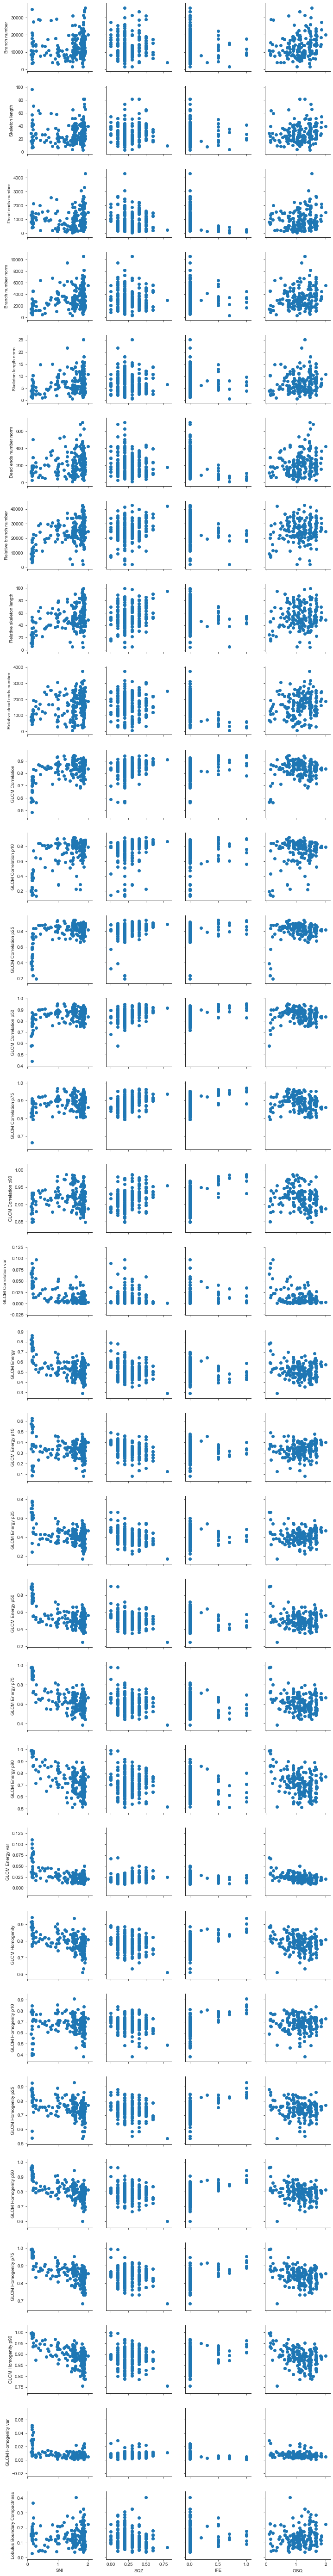

In [242]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    df[dfselector], y_vars=[
        *features
    ], 
    x_vars=[
#     "PFCVI", 
        "SNI", 
#         "SWP", 
        "SQZ",
#     "Sum Semi-q", 
        "IFE",
        "OSQ",
    ])
g.map(plt.scatter);

In [243]:
# ### Pearson correlation coefficient

# Absolute Pearson Correlation - usefull for linear



### Spearman correlation coefficient

Absolute Spearman Correlation 

In [244]:
# cm =sns.color_palette("coolwarm", 7, as_cmap=True)
cm = sns.light_palette("green", as_cmap=True)
# cm = sns.light_palette("green", as_cmap=True)
# dfcor.corr('spearman').abs().style.background_gradient(cmap=cm, low=0, high=1)
cor = df[dfselector][[
        *annotations,
#         "PFCVI", "SNI", "SWP", "CMP", "SQZ", "IFE", "OSQ",
        *features
]].corr('spearman').abs()[len(annotations):][[
    *annotations,
#     "PFCVI", "SNI", "SWP", "CMP", "IFE", "SQZ",  "OSQ",
#                                   "Sum Semi-q"
                                 ]].style.background_gradient(
    cmap=cm, 
#     cmap=plt.cm.Reds, 
    low=0, high=1)
cor
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)


,PFCVI,SNI,SWP,CMP,IFE,SQZ,OSQ
Branch number,0.00768832,0.268464,0.137885,0.000857261,0.161813,0.0184618,0.213635
Skeleton length,0.081494,0.266469,0.173527,0.0606902,0.132627,0.00657607,0.203083
Dead ends number,0.373662,0.0330131,0.535008,0.137422,0.452122,0.0704964,0.127462
Branch number norm,0.72422,0.246947,0.845778,0.101086,0.0366118,0.0867163,0.165379
Skeleton length norm,0.653489,0.247528,0.792975,0.0478314,0.00432004,0.0606068,0.148643
Dead ends number norm,0.555082,0.137145,0.600144,0.019058,0.426812,0.174624,0.198273
Relative branch number,0.770349,0.411339,0.873355,0.30597,0.193357,0.203086,0.053261
Relative skeleton length,0.761123,0.392092,0.867329,0.270006,0.110538,0.199868,0.0415562
Relative dead ends number,0.555082,0.192625,0.447555,0.284061,0.488363,0.00228731,0.105101
GLCM Correlation,0.687317,0.326373,0.499644,0.503781,0.172991,0.381502,0.0905258


## Graph for paper

In [245]:

best_features = [
#     "Branch number", "Skeleton length",
#                                   'GLCM Correlation',
#        'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
#        'GLCM Correlation p75', 'GLCM Correlation p90', 
    'GLCM Correlation var',
#        'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
#        'GLCM Energy p75', 
    'GLCM Energy p90', 
#     'GLCM Energy var',
#        'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
#        'GLCM Homogenity p50', 'GLCM Homogenity p75', 
    'GLCM Homogenity p90',
#        'GLCM Homogenity var',
#         'Lobulus Boundary Compactness',    
           ]
best_annotations = [
    "SNI",# "IFE", "SQZ"
]

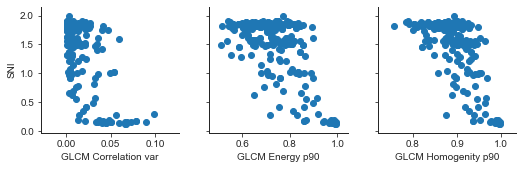

In [246]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    df[dfselector], y_vars=[
        *best_annotations
    ], 
    x_vars=[
        *best_features
    ])
ax = g.map(plt.scatter);
ax
# uu = ax.spines["top"].set_visible(True)
# uu = ax.spines["right"].set_visible(True)
# g.axes[0][0].ax.spines["top"].set_visible(True)
plt.savefig(output_path_images / "SNI_features.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_features.png", bbox_inches='tight', dpi=800)

# Micant paper

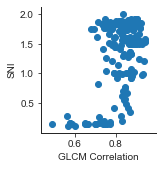

In [247]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    df[dfselector], y_vars=[
        *best_annotations
    ], 
    x_vars=[
        "GLCM Correlation"
    ])
ax = g.map(plt.scatter);
ax
# uu = ax.spines["top"].set_visible(True)
# uu = ax.spines["right"].set_visible(True)
# g.axes[0][0].ax.spines["top"].set_visible(True)
plt.savefig(output_path_images / "SNI_features_corr_micrant.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_features_corr_micrant.png", bbox_inches='tight', dpi=800)
plt.savefig(output_path_images / "SNI_features_corr_micrant.eps", bbox_inches='tight', dpi=800)

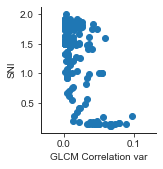

In [248]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    df[dfselector], y_vars=[
        *best_annotations
    ], 
    x_vars=[
        "GLCM Correlation var"
    ])
ax = g.map(plt.scatter);
ax
# uu = ax.spines["top"].set_visible(True)
# uu = ax.spines["right"].set_visible(True)
# g.axes[0][0].ax.spines["top"].set_visible(True)
plt.savefig(output_path_images / "SNI_features_corr_var_micrant.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_features_corr_var_micrant.png", bbox_inches='tight', dpi=800)
plt.savefig(output_path_images / "SNI_features_corr_var_micrant.eps", bbox_inches='tight', dpi=800)

In [249]:
dir(g.axes[0][0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

In [250]:
df[["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation"]].corrwith(df[["Skeleton length", "PFCVI", "SNI", "SWP", "Sum Semi-q"]])

Branch number      NaN
GLCM Correlation   NaN
GLCM Energy        NaN
GLCM Homogenity    NaN
PFCVI              NaN
SNI                NaN
SWP                NaN
Skeleton length    NaN
Sum Semi-q         NaN
dtype: float64

# Regression

## Feature selection


In [251]:
from sklearn.model_selection import train_test_split
from typing import List

from sklearn.linear_model import LinearRegression
import sklearn

In [252]:
# features = all features

def train_and_measure_error(features:List[str]):
    
    print(features)
    dff = df[dfselector][features]
    X = dff.values
    y = df[dfselector]["SNI"].values

    display(X.shape)
    display(y.shape)

    # split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    reg = LinearRegression().fit(X_train, y_train)
    print(f"Score={reg.score(X_test, y_test)}")
    display(reg.coef_)

    display(reg.intercept_)
    print("predict")
    # display(reg.predict([X[:,5]]))
    # y[5]
    y_test_predict = reg.predict(X_test)
    print(f"mean X_train={np.mean(X_train, 0)}")
    mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predict)
    print(f"Mean Absolute Error={mae}")
    return reg, X_train, X_test, y_train, y_test, mae

## All features


In [253]:
reg, X_train, X_test, y_train, y_test, mae = train_and_measure_error(features)

['Branch number', 'Skeleton length', 'Dead ends number', 'Branch number norm', 'Skeleton length norm', 'Dead ends number norm', 'Relative branch number', 'Relative skeleton length', 'Relative dead ends number', 'GLCM Correlation', 'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50', 'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var', 'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50', 'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var', 'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25', 'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90', 'GLCM Homogenity var', 'Lobulus Boundary Compactness']


(293, 31)

(293,)

Score=0.6368200236224013


array([ 3.84379595e-05, -1.39117476e-02, -8.51515245e-06, -5.69283649e-04,
        2.31100004e-01,  2.12169329e-03,  4.83664679e-05, -2.01468829e-02,
       -2.88902951e-04,  1.58114346e+01,  1.58354023e-01, -1.56882484e+00,
       -5.53470931e+00, -5.84049316e+00, -2.05471670e+00,  1.58904019e+01,
        2.02955608e+00, -9.75563529e+00,  1.57731227e+00,  7.58839495e-01,
       -9.54369749e-01,  7.29590423e+00, -8.14849564e+01,  1.32549252e+01,
        9.26521430e+00, -6.35621665e+00, -3.15712977e+00, -1.95189387e+00,
       -1.72575865e+01,  1.37087946e+02, -1.31623086e+00])

6.03192504530397

predict
mean X_train=[1.34701581e+04 2.91656089e+01 9.25376068e+02 3.39137026e+03
 7.40214256e+00 2.10164518e+02 2.50645521e+04 5.44373901e+01
 1.59157938e+03 8.35488048e-01 7.38346096e-01 8.05941973e-01
 8.55082297e-01 8.89541877e-01 9.20068620e-01 1.32402624e-02
 5.30607454e-01 3.30940713e-01 4.24069452e-01 5.27375809e-01
 6.35342079e-01 7.36384085e-01 2.60520412e-02 7.93251508e-01
 6.78528819e-01 7.48552585e-01 8.04826388e-01 8.52203886e-01
 8.93159503e-01 8.78279848e-03 1.37692324e-01]
Mean Absolute Error=0.2042673619384524


In [254]:
# dff = df[dfselector][features]
# X = dff.values
# y = df[dfselector]["SNI"].values

# display(X.shape)
# display(y.shape)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## Manual feature selection


Select the same features as without MicrAnt. It make sense that it does not work so well.

In [255]:
from sklearn.feature_selection import f_regression, mutual_info_regression
mutual_info_regression(X_train, y_train)

array([0.02128412, 0.13176582, 0.1529159 , 0.10669666, 0.17376165,
       0.08601039, 0.35881589, 0.28637901, 0.1675819 , 0.34251841,
       0.41386607, 0.26971221, 0.20179839, 0.21056288, 0.26437187,
       0.32183828, 0.27247227, 0.34047154, 0.26489506, 0.32994553,
       0.4242457 , 0.42543677, 0.36286233, 0.23638301, 0.23224814,
       0.31004928, 0.45738508, 0.42701291, 0.49897207, 0.1837012 ,
       0.12067204])

In [256]:
reg_bf, X_train_bf, X_test_bf, y_train_bf, y_test_bf, mae_bf = train_and_measure_error(best_features)

['GLCM Correlation var', 'GLCM Energy p90', 'GLCM Homogenity p90']


(293, 3)

(293,)

Score=0.5894951130177406


array([-14.62970941,  -0.42352708,  -4.53069244])

6.033337526195945

predict
mean X_train=[0.01324026 0.73638409 0.8931595 ]
Mean Absolute Error=0.2222708990652732


In [257]:
## Try automatic selection

In [258]:
# from sklearn.linear_model import LinearRegression
# import sklearn
# reg = LinearRegression().fit(X_train, y_train)
# display("Score")
# display(reg.score(X_test, y_test))
# display(reg.coef_)

# display(reg.intercept_)
# print("predict")
# # display(reg.predict([X[:,5]]))
# # y[5]
# y_test_predict = reg.predict(X_test)
# sklearn.metrics.mean_absolute_error(y_test, y_test_predict)

In [259]:
# sl = [5,10,15]
# display(X[sl, :])
# display(y[sl])
# display(reg.predict(X[sl,:]))

## Try automatic selection

In [260]:
# import sklearn
# sklearn.

In [274]:
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# dff = df[dfselector][features]
# Xf = dff.values




# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
# clf = LassoCV(cv=5)
# clf = LassoCV()
# clf = LinearSVC()
clf = LinearRegression()


# Set a minimum threshold of 0.25
# sfm = SelectFromModel(clf)# , max_features=3)#, threshold=0.1)
sfm = SelectFromModel(clf, max_features=4)#, threshold=0.1)
sfm.fit(X_train, y_train)
display(sfm.get_support())
Xtr_train = sfm.transform(X_train)
Xtr_test = sfm.transform(X_test)
display(Xtr_test.shape)

clf.fit(Xtr_train, y_train)
display("score")
display(clf.score(Xtr_test, y_test))
clf.score



array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False])

(59, 4)

'score'

0.6230976098332067

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

### Selected features

In [262]:
np.asarray(features)[sfm.get_support()]

array(['GLCM Energy var', 'GLCM Homogenity p90', 'GLCM Homogenity var'],
      dtype='<U28')

In [263]:
sfm.estimator_.coef_

array([ 3.84379595e-05, -1.39117476e-02, -8.51515245e-06, -5.69283649e-04,
        2.31100004e-01,  2.12169329e-03,  4.83664679e-05, -2.01468829e-02,
       -2.88902951e-04,  1.58114346e+01,  1.58354023e-01, -1.56882484e+00,
       -5.53470931e+00, -5.84049316e+00, -2.05471670e+00,  1.58904019e+01,
        2.02955608e+00, -9.75563529e+00,  1.57731227e+00,  7.58839495e-01,
       -9.54369749e-01,  7.29590423e+00, -8.14849564e+01,  1.32549252e+01,
        9.26521430e+00, -6.35621665e+00, -3.15712977e+00, -1.95189387e+00,
       -1.72575865e+01,  1.37087946e+02, -1.31623086e+00])

### Error

In [275]:

y_test_predict = clf.predict(Xtr_test)
sklearn.metrics.mean_absolute_error(y_test, y_test_predict)

0.21617385094745686

# Prediction example

In [265]:
sl = [5,10,50]
Xtr = sfm.transform(X)
display(Xtr[sl, :])
display(y[sl])
display(clf.predict(Xtr[sl,:]))

array([[0.03586075, 0.8980102 , 0.01153731],
       [0.0827845 , 0.98787932, 0.04155   ],
       [0.03434028, 0.95145527, 0.00754758]])

array([0.92761713, 0.19136037, 0.19867925])

array([1.34655811, 0.26514868, 1.02811075])

In [266]:
dfs = df[dfselector]

In [267]:
# dfs["Prediction"] = clf.predict(Xtr)
dfs["Prediction"] = reg.predict(X)

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [268]:
# list(dfs.keys())

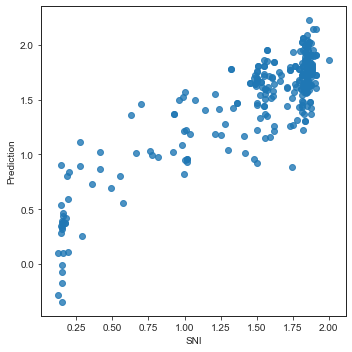

In [269]:
wax = sns.lmplot(data=dfs, x="SNI", y="Prediction", fit_reg=False)
ax = wax.ax
uu = ax.spines["top"].set_visible(True)
uu = ax.spines["right"].set_visible(True)
plt.savefig(output_path_images / "SNI_prediction.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_prediction.png", bbox_inches='tight', dpi=800)

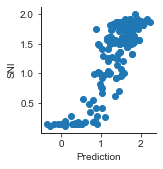

In [270]:

g = sns.PairGrid(
    dfs, y_vars=[
        *best_annotations
    ], 
    x_vars=[
#         *best_features
        "Prediction"
    ])
g.map(plt.scatter);

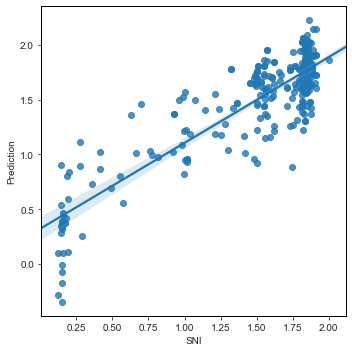

In [271]:
# sns.set_style("white")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
# with sns.axes_style("ticks"):

#     sns.despine()
wax = sns.lmplot(data=dfs, x="SNI", y="Prediction")
ax = wax.ax
uu = ax.spines["top"].set_visible(True)
uu = ax.spines["right"].set_visible(True)
# ax.axes.set_axis_on()
# ax.axes.spi
# uu.set_visible(True)
# dir(uu)

In [272]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.for

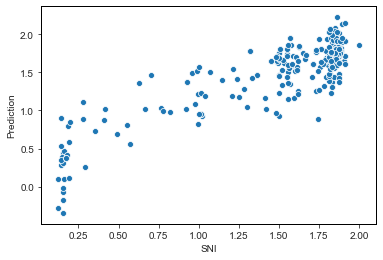

In [273]:
# sns.despine()
sns.scatterplot(data=dfs, x="SNI", y="Prediction")
